In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report, plot_confusion_matrix, plot_roc_curve, SCORERS

In [39]:
df = pd.read_csv('sonar.all-data.csv')

In [40]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [43]:
df.isna().sum()

Freq_1     0
Freq_2     0
Freq_3     0
Freq_4     0
Freq_5     0
          ..
Freq_57    0
Freq_58    0
Freq_59    0
Freq_60    0
Label      0
Length: 61, dtype: int64

In [44]:
def fn(df):
    per = 100*df.isna().sum()/len(df)
    per = per[per > 0]
    return per

In [45]:
fn(df)

Series([], dtype: float64)

In [46]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Freq_1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
Freq_2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
Freq_3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
Freq_4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
Freq_5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
Freq_6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
Freq_7,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
Freq_8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
Freq_9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
Freq_10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


<AxesSubplot:xlabel='Label', ylabel='count'>

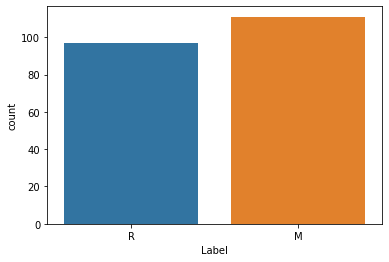

In [47]:
sns.countplot(data=df, x='Label')

<AxesSubplot:>

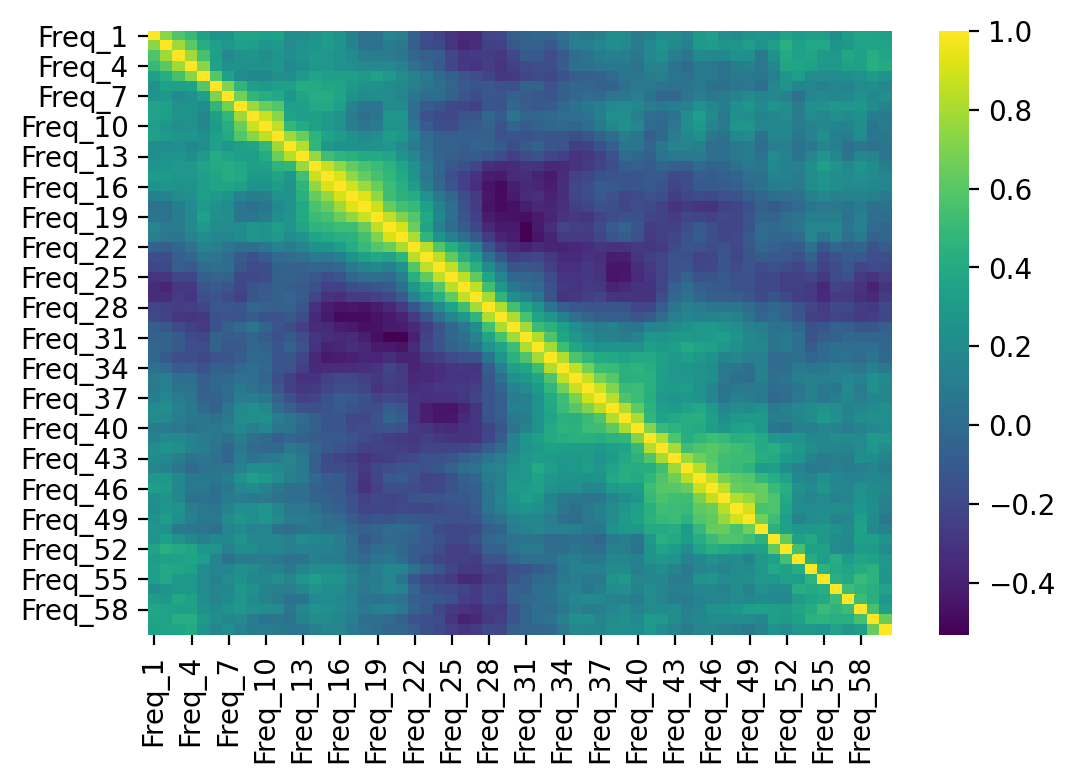

In [52]:
plt.figure(dpi=200)
sns.heatmap(df.corr(), cmap='viridis')

In [63]:
X = df.drop('Label', axis=1)
y = df['Label']

In [73]:
scaler = StandardScaler()

In [74]:
knn = KNeighborsClassifier()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [66]:
X_train = scaler.fit_transform(X_train)

In [67]:
X_test = scaler.transform(X_test)

In [76]:
operations = [('scaler', scaler), ('knn', knn)]

In [77]:
pipe = Pipeline(operations)

In [68]:
test_err = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    err = 1-accuracy_score(y_test, pred)
    test_err.append(err)

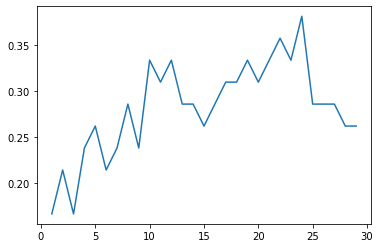

In [69]:
plt.plot(range(1, 30), test_err)

In [78]:
n = list(range(1, 30))
param_grid = {'knn__n_neighbors': n, 'knn__p' : [1,2,3], 'knn__metric': ['euclidean','manhattan','minkowski']}

In [79]:
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='accuracy', verbose=2, cv=10)

In [80]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 261 candidates, totalling 2610 fits
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=1 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=3 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=3 ......

[CV]  knn__metric=euclidean, knn__n_neighbors=3, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=3, knn__p=3 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=3, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=3, knn__p=3 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=3, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=3, knn__p=3 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=3, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=3, knn__p=3 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=3, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=4, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=4, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=4, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=4, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=4, knn__p=1 ......

[CV]  knn__metric=euclidean, knn__n_neighbors=6, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=6, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=6, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=6, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=6, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=6, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=6, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=6, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=6, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=6, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=6, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=6, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=6, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=6, knn__p=2 ......

[CV]  knn__metric=euclidean, knn__n_neighbors=8, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=8, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=8, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=8, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=8, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=8, knn__p=3 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=8, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=8, knn__p=3 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=8, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=8, knn__p=3 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=8, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=8, knn__p=3 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=8, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=8, knn__p=3 ......

[CV]  knn__metric=euclidean, knn__n_neighbors=10, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=10, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=10, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=11, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=11, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=11, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=11, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=11, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=11, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=11, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=11, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=11, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=11, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=11, knn__p=

[CV]  knn__metric=euclidean, knn__n_neighbors=13, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=13, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=13, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=13, knn__p=

[CV]  knn__metric=euclidean, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=15, knn__p=

[CV]  knn__metric=euclidean, knn__n_neighbors=18, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=18, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=18, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=18, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=18, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=18, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=18, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=18, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=18, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=18, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=18, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=18, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=18, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=18, knn__p=

[CV]  knn__metric=euclidean, knn__n_neighbors=20, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=20, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=20, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=20, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=20, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=20, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=20, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=20, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=20, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=20, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=20, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=20, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=20, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=20, knn__p=

[CV]  knn__metric=euclidean, knn__n_neighbors=22, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=22, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=22, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=22, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=22, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=22, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=22, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=22, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=22, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=22, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=22, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=22, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=22, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=22, knn__p=

[CV]  knn__metric=euclidean, knn__n_neighbors=25, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=25, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=25, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=25, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=25, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=25, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=25, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=25, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=25, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=25, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=25, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=25, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=25, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=25, knn__p=

[CV]  knn__metric=euclidean, knn__n_neighbors=27, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=27, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=27, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=27, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=27, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=27, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=27, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=27, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=27, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=27, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=27, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=27, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=27, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=27, knn__p=

[CV] knn__metric=euclidean, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=1, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=1, knn__p=1, 

[CV]  knn__metric=manhattan, knn__n_neighbors=3, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=3, knn__p=2 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=3, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=3, knn__p=2 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=3, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=3, knn__p=2 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=3, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=3, knn__p=2 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=3, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=3, knn__p=2 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=3, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=3, knn__p=2 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=3, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=3, knn__p=2 ......

[CV]  knn__metric=manhattan, knn__n_neighbors=5, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=5, knn__p=3 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=5, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=5, knn__p=3 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=5, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=5, knn__p=3 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=5, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=5, knn__p=3 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=5, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=5, knn__p=3 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=5, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=5, knn__p=3 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=5, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=5, knn__p=3 ......

[CV] knn__metric=manhattan, knn__n_neighbors=8, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=8, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=8, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=8, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=8, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=8, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=8, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=8, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=8, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=8, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=8, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=8, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=8, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=8, knn__p=1, total=

[CV]  knn__metric=manhattan, knn__n_neighbors=10, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=10, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=10, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=10, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=10, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=10, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=10, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=10, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=10, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=10, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=10, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=10, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=10, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=10, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=12, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=12, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=12, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=12, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=12, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=12, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=12, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=12, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=12, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=12, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=12, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=12, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=12, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=12, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=15, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=15, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=15, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=15, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=15, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=15, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=15, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=15, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=15, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=15, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=15, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=15, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=15, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=15, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=17, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=17, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=17, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=17, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=17, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=17, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=17, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=17, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=17, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=17, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=17, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=17, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=17, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=17, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=19, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=19, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=19, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=19, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=19, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=19, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=19, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=19, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=19, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=19, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=19, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=19, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=19, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=19, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=22, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=22, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=22, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=22, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=22, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=22, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=22, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=22, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=22, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=22, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=22, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=22, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=22, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=22, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=24, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=24, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=24, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=24, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=24, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=24, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=24, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=24, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=24, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=24, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=24, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=24, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=24, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=24, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=26, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=26, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=26, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=26, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=26, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=26, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=26, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=26, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=26, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=26, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=26, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=27, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=27, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=27, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=29, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=29, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=29, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=29, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=29, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=29, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=29, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=29, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=29, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=29, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=29, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=29, knn__p=2 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=29, knn__p=2, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=29, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=2, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=2, knn__p=2 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=2, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=2, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=2, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=2, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=2, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=2, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=2, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=2, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=2, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=2, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=2, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=2, knn__p=3 ......

[CV]  knn__metric=minkowski, knn__n_neighbors=4, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=4, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=4, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=4, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=4, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=4, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=4, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=4, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=4, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=4, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=4, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=4, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=4, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=4, knn__p=3 ......

[CV]  knn__metric=minkowski, knn__n_neighbors=6, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=6, knn__p=2 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=6, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=6, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=6, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=6, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=6, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=6, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=6, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=6, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=6, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=6, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=6, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=6, knn__p=3 ......

[CV]  knn__metric=minkowski, knn__n_neighbors=8, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=8, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=8, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=8, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=8, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=8, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=8, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=8, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=8, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=8, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=8, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=8, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=8, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=8, knn__p=3 ......

[CV]  knn__metric=minkowski, knn__n_neighbors=10, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=10, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=10, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=10, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=10, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=10, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=10, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=10, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=10, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=11, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=11, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=11, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=11, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=11, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=12, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=12, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=12, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=12, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=12, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=13, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=13, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=13, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=13, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=13, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=13, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=13, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=13, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=13, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=14, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=15, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=15, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=15, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=15, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=15, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=15, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=15, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=15, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=15, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=15, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=15, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=15, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=15, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=17, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=17, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=17, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=17, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=17, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=17, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=17, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=17, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=17, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=17, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=17, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=17, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=17, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=17, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=19, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=19, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=19, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=19, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=19, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=19, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=19, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=19, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=19, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=19, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=19, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=19, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=19, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=19, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=21, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=21, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=21, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=21, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=21, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=21, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=21, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=21, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=21, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=21, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=21, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=21, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=21, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=21, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=23, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=23, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=23, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=23, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=23, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=23, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=23, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=23, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=23, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=23, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=23, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=23, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=23, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=23, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=25, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=25, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=25, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=25, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=25, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=25, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=25, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=25, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=25, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=25, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=25, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=25, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=25, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=25, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=27, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=27, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=27, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=27, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=27, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=27, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=27, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=27, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=27, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=27, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=27, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=27, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=27, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=27, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=29, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=29, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=29, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=29, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=29, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=29, knn__p=

[Parallel(n_jobs=1)]: Done 2610 out of 2610 | elapsed:   29.8s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29],
                         'knn__p': [1, 2, 3]},
             scoring='accuracy', verbose=2)

In [81]:
grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=1, p=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(metric='manhattan', n_neighbors=1, p=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'manhattan',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 1,
 'knn__weights': 'uniform'}

In [82]:
pred = grid.predict(X_test)

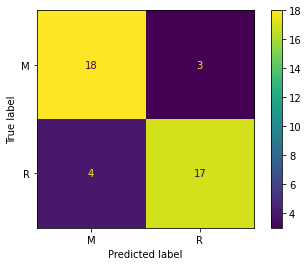

In [83]:
plot_confusion_matrix(grid, X_test, y_test)

In [84]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           M       0.82      0.86      0.84        21
           R       0.85      0.81      0.83        21

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42



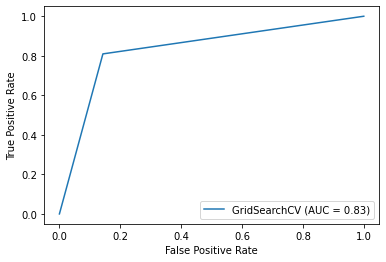

In [85]:
plot_roc_curve(grid, X_test, y_test)